In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [124]:
df = pd.read_json("./indiceATMOdataset3.json")
df.head()

,zone_id,date_ech,date_dif,no2,so2,o3,pm10,pm25,valeur
0,35416,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
1,35417,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
2,35418,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
3,35419,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
4,35421,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2


In [125]:
daysPredictions=df.groupby(["zone_id","date_ech"])
daysPredictions.head()
# print(df.size)
# print(daysPredictions.size().count())


,zone_id,date_ech,date_dif,no2,so2,o3,pm10,pm25,valeur
0,35416,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
1,35417,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
2,35418,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
3,35419,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
4,35421,2023-04-10 00:00:00,2023-04-10 00:00:00,1,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...
1122636,33055,2023-04-10 00:00:00,2023-04-09 00:00:00,1,1,3,1,1,3
1122637,33057,2023-04-10 00:00:00,2023-04-09 00:00:00,2,1,3,2,2,3
1122638,33059,2023-04-10 00:00:00,2023-04-09 00:00:00,2,1,3,2,2,3
1122639,33061,2023-04-10 00:00:00,2023-04-09 00:00:00,2,1,3,2,2,3


In [126]:
#enlever les lignes ou on a pas en même temps la prédiction de J-0 et celle de J-1
nb_2records=(daysPredictions.size() == 2).sum()
nb_total=daysPredictions.size().count()
print(nb_2records,"/",nb_total,"have 2 predictions for the same city and day")
#print(daysPredictions.size())


107312 / 371573 have 2 predictions for the same city and day


In [127]:
filtered_df = df[daysPredictions['date_dif'].transform('size') == 2].groupby(["zone_id","date_ech"])
dif={}

#si 2 valeurs différentes de gaz alors on la garde et on somme
dif["no2"] = (filtered_df['no2'].nunique() > 1).sum()
dif["so2"] = (filtered_df['so2'].nunique() > 1).sum()
dif["o3"] = (filtered_df['o3'].nunique() > 1).sum()
dif["pm10"] = (filtered_df['pm10'].nunique() > 1).sum()
dif["pm25"] = (filtered_df['pm25'].nunique() > 1).sum()
dif["indicateur global"] = (filtered_df['valeur'].nunique() > 1).sum()

for indice in dif:
    dif[indice]=round(dif[indice]/nb_2records*100,2)
    print(dif[indice],"% de différence entre J-0 et J-1 pour",indice)

print(df["zone_id"].nunique(),"communes différentes")

# filtered_df.head()

10.31 % de différence entre J-0 et J-1 pour no2
9.82 % de différence entre J-0 et J-1 pour so2
18.15 % de différence entre J-0 et J-1 pour o3
11.97 % de différence entre J-0 et J-1 pour pm10
15.99 % de différence entre J-0 et J-1 pour pm25
10.47 % de différence entre J-0 et J-1 pour indicateur global
2058 communes différentes


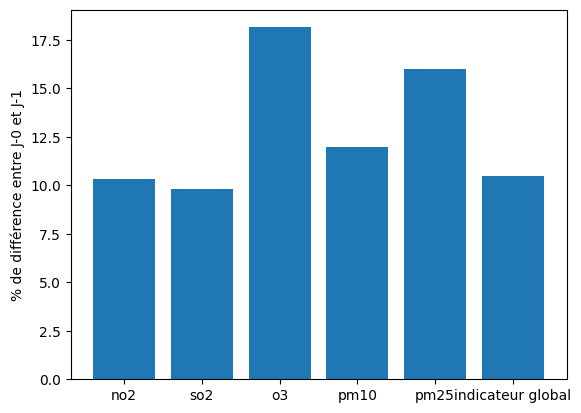

In [128]:
names=[indice for indice in dif]
values=[dif[indice] for indice in dif]

plt.bar(names, values)
plt.ylabel('% de différence entre J-0 et J-1')

plt.show()